## 2023年度 航空宇宙情報システム学第三（矢入担当分）
## システム推定論入門 　補助資料


# <center> 第2回 最尤法 </center>


### <center>2023年10月10日</center>

このノートブックは補助資料です。授業スライドがメインですので詳細はそちらを参照してください。


# [例題] ベルヌーイ試行: 表裏が出る確率が等しくないかもしれないコイン

10回投げたところ、

表、表、裏、表、表、表、裏、表、裏、表

という結果だったとします。このコインの
表が出る確率を$\theta$とするとき、尤度関数および対数尤度関数がどのように変化するかを調べてみましょう。

尤度関数は、
$$
L(\theta)=P(D\vert \theta)= \theta^7 \cdot (1-\theta)^3
$$

対数尤度関数は、
$$
LL(\theta)= \log L(\theta) = 7 \cdot \log \theta + 3 \cdot \log (1-\theta)
$$

<ipython-input-1-d779c2d4783f>:8: RuntimeWarning: divide by zero encountered in log
  return 7*np.log(th) + 3*np.log(1-th)


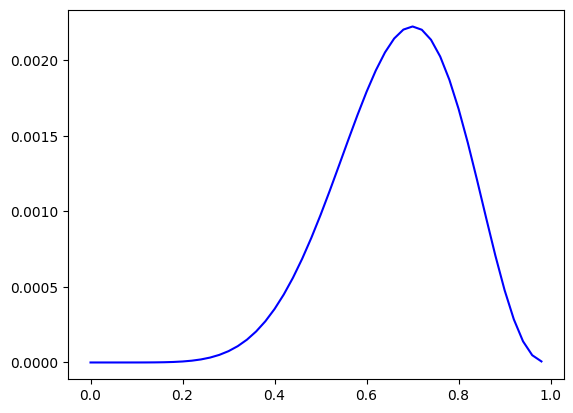

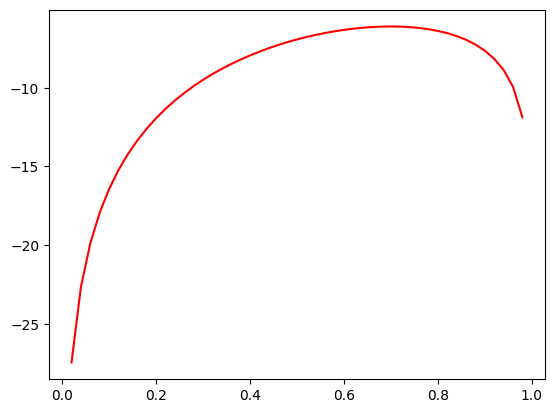

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def likelihood_coin(th):
  return th**7 * (1-th)**3

def loglikelihood_coin(th):
  return 7*np.log(th) + 3*np.log(1-th)

th = np.arange(0.0,1.0,0.02)
# 尤度
lkhd = likelihood_coin(th)
plt.plot(th,lkhd,'b-')
# 対数尤度
llkhd = loglikelihood_coin(th)
plt.figure()
plt.plot(th,llkhd,'r-')

## 二項分布の確率関数

各試行での発生確率が$p$である事象を考えます。この試行を$n$回行ったときに、事象が発生した回数を独立変数$X$で表すとします。ただし各試行は互いに独立であるとします。このとき、$X=k$（ただし、$k$は0以上$n$以下の整数。）である確率$P(X=k)$は、二項分布$B(n,p)$に従います。
$$
P(X=k)={}_n C_k p^k (1-p)^{n-k} = \left(
\begin{array}{c}
n \\
k
\end{array} \right) p^k (1-p)^{n-k}
$$

式だけだと分かりにくいので、$n$は50に固定しつつ、$p$の値を、$0.1,0.2,0.3,0.4,0.5$ と変えたときの、$P(X=k)$のグラフを描いてみます。
組み合わせの数 ${}_n C_k$の計算は、再帰呼び出し等で実装しても良いのですが、ここでは楽をして、scipyに含まれる `comb`関数を使います。

(注1)
Python のバージョン 3.8以降では、標準数学モジュールmathの中に、'comb'関数が含まれています。

(注2)
本格的に二項分布を扱う場合には、scipy.stats.binom オブジェクトを用いことが推奨されます。

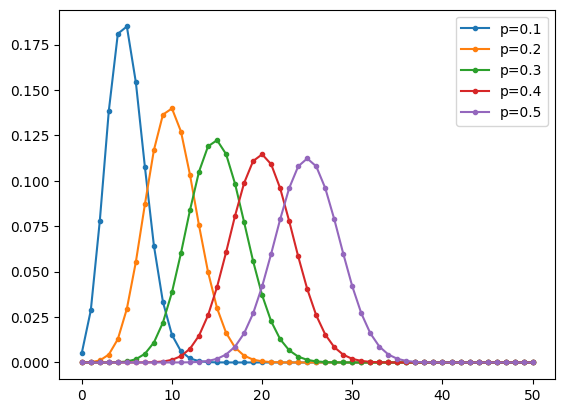

In [ ]:
from scipy.special import comb

n=50
plt.figure()
plst = [0.1,0.2,0.3,0.4,0.5]
for p in plst:
  parr = [comb(n,k)*p**k*(1-p)**(n-k) for k in range(n+1)]
  plt.plot(range(n+1),parr,'.-',label='p={}'.format(p))
plt.legend()

二項分布 $B(n,p)$は、平均が $\mu=E[X]=np$、分散が$V(X)=E[(X-\mu)^2]=np(1-p)$ となります。
また、上のグラフからも想像されるように、$n$が十分大きいとき、正規分布 ${\cal N}(np,np(1-p))$ に近づきます。

## [例題] 正規分布に従うデータ

ある実験計測を行ったところ、次のような観測
データ$D = \{x_1, x_2,\cdots,x_{10} \}$
が得られたとします。


| $i$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|-----|---|---|---|---|---|---|---|---|---|----|
|$x_i$|2.1 | 2.7 | 8.9 | 7.9 |10.4| 5.8| 1.5| 5.0| 5.7| 5.9|

このデータが平均$\mu$ 分散$\sigma^2$の正規分布 $𝑁(\mu,\sigma^2)$
によって発生したと仮定したときの、尤度
$𝐿(\mu,\sigma^2)$ と対数尤度$LL(\mu,\sigma^2)$を求めよ。

とりあえず、対数尤度だけですが、3次元プロットするとつぎのような感じになります。


55.9 389.67


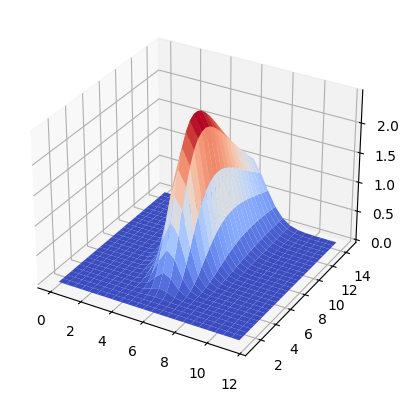

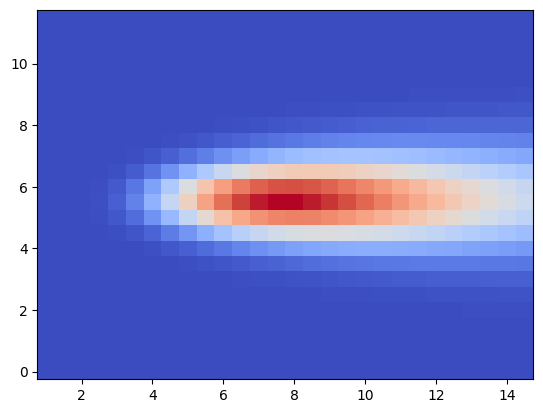

In [ ]:
n = 10
x = np.array([2.1,2.7,8.9,7.9,10.4,5.8,1.5,5.0,5.7,5.9])
sumx = np.sum(x)
sumx2 = np.sum(x**2)
print(sumx,sumx2)

def loglikelihood_normal(mu,s2):
  return -0.5*n*np.log(2*np.pi*s2) - 0.5*(sumx2-2*sumx*mu+n*mu**2)/s2

mu = np.arange(0,12,0.5).reshape((-1,1))
s2 = np.arange(1,15,0.5).reshape((1,-1))
Mu,S2 = np.meshgrid(mu,s2)
llkd = loglikelihood_normal(Mu,S2)
lkd = np.exp(llkd)

from mpl_toolkits import mplot3d
from matplotlib import cm
ax = plt.axes(projection="3d")
ax.plot_surface(Mu,S2,lkd,cmap=cm.coolwarm)

plt.figure()
plt.pcolormesh(np.arange(0.75,15,0.5),np.arange(-0.25,12,0.5),lkd.T,cmap=cm.coolwarm)

## [例題] (最尤法による)データの直線近似

下表は単位人口あたりの医師数の平方根（𝑥）と平均寿命（𝑦）の関
係を調査したデータの一部です。 $𝑦 = 𝑎𝑥 + 𝑏 + 𝑒$ というモデルを
仮定したとき、パラメータ $𝑎$, $𝑏$, $\sigma^2$ を最尤推定してください。ただし、誤差項
$𝑒$ は平均 $0$ , 分散 $\sigma^2$ の正規分布 $𝑁(0, \sigma^2)$ に従うと仮定します。

とりあえず、プロットだけしますが、直線を求めるだけであれば、最小二乗法による直線当てはめと同じです。

Text(0, 0.5, 'life exp')

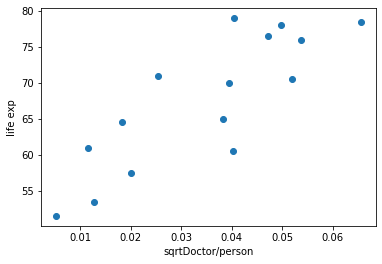

In [ ]:
# 国のリスト
contries = ['Argentina', 'Bangladesh', 'Brazil', 'Canada', 'China', 'Colombia', 'Egypt','Ethiopia', 'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Italy', 'Japan']
# 医師数の平方根
x = np.array([0.05198752, 0.01273498, 0.03823596, 0.04719292, 0.03943615, 0.02539184, 0.04029115, 0.0052228000000000005, 0.04981355, 0.05376033, 0.02011702, 0.01160361, 0.01828181, 0.06551218, 0.04052204])
# 平均寿命
y = np.array([70.5, 53.5, 65.0, 76.5, 70.0, 71.0, 60.5, 51.5, 78.0, 76.0, 57.5, 61.0, 64.5, 78.5, 79.0])

plt.scatter(x,y)
plt.xlabel("sqrtDoctor/person")
plt.ylabel("life exp")

## [例題(発展)］不完全データの最尤推定(ボール投げデータ)


(array([ 1.,  7., 10.,  8.,  4., 11.,  4.,  2.,  1.,  2.]),
 array([ 0.8 ,  6.66, 12.52, 18.38, 24.24, 30.1 , 35.96, 41.82, 47.68,
        53.54, 59.4 ]),
 <a list of 10 Patch objects>)

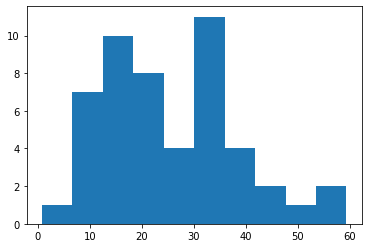

In [ ]:
X = [22.2, 15.1, 15.9, 30.7, 16.2, 41. , 40.3, 35.5, 34.3, 52.3, 42.2,
       25.2, 17.3, 54.6, 40.4, 32.6, 24. , 22.3, 30.9, 37. , 21.1, 23.7,
       19.7, 21. , 16.4, 34.3, 18.1, 26.8, 12.1,  7.3, 15.5, 10.7, 59.4,
       30.5,  8. , 44. , 27.3, 16. , 12.4, 18.1, 18.1, 34.2, 10.3, 33.8,
       34.2,  0.8, 32.2, 11.8, 26.1, 24.1]
# ヒストグラム
plt.hist(X)

このデータは、2つの正規分布(ガウス分布)の混合(Mixture)でモデル化するのが妥当と考えられます。 つまり、$x_i$が発生する確率密度は、次式のようになります。
$$
p(x_i \vert \boldsymbol{\theta}) = \sum_{s \in \{ M,F \}} \alpha_s \cdot \frac{1}{\sqrt{2\pi\sigma_{s}^2}} \exp \left[ \frac{-(x_i-\mu_s)^2}{2\sigma^2_s} \right]
$$
対数尤度は、この$p(x_i \vert \boldsymbol{\theta})$を使って、
$$
LL(\boldsymbol{\theta}) = \sum_{i=1}^n \log p(x_i \vert \boldsymbol{\theta})
$$
と書けますが、解析的にこれを最大化する$\hat{\boldsymbol{\theta}}$を求めることはできないので、数値的に最適化を行う必要があります。
(→ **[練習問題]**)